# Answer to homework 2

# 1.1 
`Theory`

[Code](#1.1-Theory)


## a)
Sample Entropy = $H(Y) = 0.9852$

## b)
Information gain I for $x_1 = I_{x_1} = 0.1831$

Information gain I for $x_2 = I_{x_2} = 0.0449$

## c)
```

              x1
              ||
      --T-----  -----F--
      |                |
      x2               x2
      ||               ||
 --T--  --F--     --T--  --F--
 |          |     |          |
 +          +     +          -
 ```

# 1.2 
`Theory`

[Code](#1.2-Theory)

## a)
$P[A=Yes] = P[Y=+]=0.6$

$P[A=No] = P[Y=-]=0.4$

## b)
$\mu_{x_1|Y=+}=115.0, \sigma^2_{x_1|Y=+}=71.5122$

$\mu_{x_1|Y=-}=347.5, \sigma^2_{x_1|Y=-}=45.5$

$\mu_{x_2|Y=+}=4.54, \sigma^2_{x_2|Y=+}=1.0427$

$\mu_{x_2|Y=-}=3.255, \sigma^2_{x_2|Y=-}=0.9450$

<!-- {'x1': [(115.0, 71.5122367151245), (347.5, 45.5)],
 'x2': [(4.54, 1.0426888318189658), (3.255, 0.9450000000000001)]} -->

## c)

$P[Y=+|X] = P[Y=+]\times P[X=x_1|Y=+] \times P[X=x_2|Y=+] = 0.0197$

$P[Y=-|X] = P[Y=-]\times P[X=x_1|Y=-] \times P[X=x_2|Y=-] = 0.0017$

$P[Y=+|X]=0.0197 > P[Y=-|X]=0.0017$

Classification is: Y=+, meaning an essay with 242 char and 4.56 word avg length should get and A

# 1.3 
`Theory`

[Code](#1.3-Theory)

## a)

We can use the validation set to see what is the best value for k -- the number nearest neighbors. Specifically, we can use the Receiver Operating Characteristic curve to assess the performance of a certain 'k'.

# 2. 
`Logistic Regression`

[Code](#2.-Logistic-Regression)

My logistic regression: $\theta_{my} = [10.1913014 , 15.71517823, -7.70486056]$

Sklearn logistic regression: $\theta_{sklearn} = [47.81414621 , 67.26895116, -30.03507303]$

[Decision Boundary Graph](#2.-Logistic-Decision-Boundary-Graph)

# 3. 
`Logistic Regression Spam Classification`

[Code](#3.-Logistic-Regression-Spam-Classification)

acc=0.8664, precision=0.7203, recall=0.3371, f1_measure=0.4593

# 4. 
`Naive-Bayes Classifier`

[Code](#4.-Naive-Bayes-Classifier)

acc=0.8429, precision=0.6415, recall=0.3086, f1_measure=0.4167

# 5. 
`Decision Trees`

[Code](#5.-Decision-Trees)


1. Using Information Gain as the measure to choose the best attributes (runtime = 27.6 s):

acc=0.8990, precision=0.8666, recall=0.3909, f1_measure=0.5387

2. Using Naive method of picking attributes from left to right (0->1->2->...->56) (runtime = 3.4 s):

acc=0.8481, precision=0.8280, recall=0.3958, f1_measure=0.5356

In [1]:
import os
import csv
import math
import random
import copy
import operator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
if 'src' not in os.getcwd():
    os.chdir(f"{os.getcwd()}/src")

In [4]:
# define cross entropy function (log2)
cross_entropy = lambda x: -x*np.log2(x)

# 1.1 Theory

In [5]:
df1 = pd.DataFrame({
    "Y" : ['+', '+', '+', '+', '-', '-', '-', '-'], 
    "x1" : ['T', 'T', 'F', 'F', 'T', 'T', 'F', 'F'],
    "x2" : ['T', 'F', 'T', 'F', 'T', 'F', 'T', 'F'],
    "Count" : [3, 4, 4, 1, 0, 1, 3, 5]
})
df1

,Y,x1,x2,Count
0,+,T,T,3
1,+,T,F,4
2,+,F,T,4
3,+,F,F,1
4,-,T,T,0
5,-,T,F,1
6,-,F,T,3
7,-,F,F,5


In [6]:
total = np.sum(df1["Count"])
E_Y_pos = cross_entropy(np.sum(df1[df1['Y'] == '+']["Count"])/total)
E_Y_neg = cross_entropy(np.sum(df1[df1['Y'] == '-']["Count"])/total)
E_Y = E_Y_pos + E_Y_neg
print(f"Sample Entropy={E_Y:.4f}")

Sample Entropy=0.9852


In [7]:
# Information gain for feature x1
info_gains = {'x1': 0, 'x2': 0}
for feature in info_gains:
    entropy = 0
    for val in set(df1[feature]):
        t = np.sum(df1[df1[feature] == val]["Count"])
        p = np.sum(df1[(df1[feature] == val) & (df1['Y'] == '+')]["Count"])
        n = t-p
        entropy += (t/total)*(cross_entropy(p/t) + cross_entropy(n/t))
    info_gains[feature] = E_Y - entropy

print(f"Info gains={info_gains}")

print('''
              x1
              ||
      --T-----  -----F--
      |                |
      x2               x2
      ||               ||
 --T--  --F--     --T--  --F--
 |          |     |          |
 +          +     +          -
''')

Info gains={'x1': 0.18310473570119645, 'x2': 0.04488331134123014}

              x1
              ||
      --T-----  -----F--
      |                |
      x2               x2
      ||               ||
 --T--  --F--     --T--  --F--
 |          |     |          |
 +          +     +          -



# 1.2 Theory

In [8]:
df2 = pd.DataFrame({
    'x1': [216, 69, 302, 60, 393],
    'x2': [5.68, 4.78, 2.31, 3.16, 4.2],
    'Y': ['+', '+', '-', '+', '-']
})
df2

,x1,x2,Y
0,216,5.68,+
1,69,4.78,+
2,302,2.31,-
3,60,3.16,+
4,393,4.20,-


In [9]:
total = len(df2)
P_Y_pos = len(df2[df2['Y'] == '+'])/total
P_Y_neg = len(df2[df2['Y'] == '-'])/total

print(f"P[Y=+]={P_Y_pos}, P[Y=-]={P_Y_neg}")

P[Y=+]=0.6, P[Y=-]=0.4


In [10]:
def standardize(x):
    return (x - np.mean(x))/np.std(x)

In [11]:
param = {'x1': [], 'x2': []}
for feature in param:
    param[feature] = [
        ( np.mean(df2[df2["Y"] == '+'][feature]) , np.std(df2[df2["Y"] == '+'][feature]) ),
        ( np.mean(df2[df2["Y"] == '-'][feature]) , np.std(df2[df2["Y"] == '-'][feature]) ),
    ]

In [12]:
param

{'x1': [(115.0, 71.5122367151245), (347.5, 45.5)],
 'x2': [(4.54, 1.0426888318189658), (3.255, 0.9450000000000001)]}

In [13]:
gaus_dist = lambda x, mu, sig: 1/(np.sqrt(2*np.pi*sig))*np.exp(-(x-mu)**2/(2*sig))

In [45]:
x1_test = 242
x2_test = 4.56
P_X1_Y_pos = gaus_dist((x1_test-param['x1'][0][0])/param['x1'][0][1], 0 , 1)
P_X2_Y_pos = gaus_dist((x2_test-param['x2'][0][0])/param['x2'][0][1], 0, 1)
P_X1_Y_neg = gaus_dist((x1_test-param['x1'][1][0])/param['x1'][1][1], 0, 1)
P_X2_Y_neg = gaus_dist((x2_test-param['x2'][1][0])/param['x2'][1][1], 0, 1)
P_Y_pos_X = P_Y_pos*P_X1_Y_pos*P_X2_Y_pos
P_Y_neg_X = P_Y_neg*P_X1_Y_neg*P_X2_Y_neg

print(f"P[Y=+|X]={P_Y_pos_X} > P[Y=-|X]={P_Y_neg_X}")
print(f"Classification is: Y=+, meaning an essay with {x1_test} char and {x2_test} word avg length should get and A")

P[Y=+|X]=0.012766722994357377 > P[Y=-|X]=0.0025514553197298834
Classification is: Y=+, meaning an essay with 242 char and 4.56 word avg length should get and A


# 1.3 Theory

In [15]:
print("We can use the validation set to see what is the best value for k -- the number nearest neighbors. Specifically, we can use the Receiver Operating Characteristic curve to assess the performance of a certain 'k'.")

We can use the validation set to see what is the best value for k -- the number nearest neighbors. Specifically, we can use the Receiver Operating Characteristic curve to assess the performance of a certain 'k'.


# 2. Logistic Regression 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [17]:
# Load in the iris dataset
iris_ds = load_iris()
X = iris_ds.data[:,:2]
y = (iris_ds.target != 0) * 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


In [18]:
class MyLogRegr:
    def __init__(self, lr=0.01, stop_iter=10000, stop_loss_delta=2e-23, standardize=False, seed=0, verbose=False):
        self.lr = lr
        self.stop_iter = stop_iter
        self.verbose = verbose
        self.standardize = standardize

        self._sigmoid = lambda z: 1 / (1 + np.exp(-z))
        self._log_loss = lambda y, h: np.mean(y * np.log(h) - (1 - y) * np.log(1 - h))
        self._y_hat = lambda x, theta: self._sigmoid(x @ theta)

        self._history = []
        self._loss_prev = 100
        self._loss_change = 100
        self._stop_loss_delta = stop_loss_delta

    def preprocess(self, X, y=None):
        if self.standardize:
            scaler = StandardScaler().fit(X)
            X = scaler.transform(X)
        X = np.append(np.ones([len(X), 1]), X, 1)
        return X, y
    
    def fit(self, X, y):
        X, _ = self.preprocess(X, None)

        np.random.seed(0)
        self.theta = 2 * np.random.rand(X.shape[1]) - 1
        pbar = tqdm(range(self.stop_iter))
        for itr in pbar:
            h = self._y_hat(X, self.theta)
            gradient = X.T @ (h - y)
            self.theta -= self.lr * gradient
            
            loss = self._log_loss(y, self._y_hat(X, self.theta))
            self._loss_change = np.abs(loss - self._loss_prev)
            self._loss_prev = loss
            
            if self._loss_change < self._stop_loss_delta:
                break
            
            self._history.append(loss)
            if self.verbose and not itr % 200:
                pbar.set_description(f"iter={itr+1}, loss={loss:.3f}, loss_chg={self._loss_change:.6f}")
    
    def predict_prob(self, X):
        X, _ = self.preprocess(X, None)
        return self._y_hat(X, self.theta)
    
    def predict(self, X, threshold):
        return self.predict_prob(X) > threshold

In [19]:
iris_model = MyLogRegr(lr=0.01, stop_iter=10000, standardize=False)
iris_model.fit(X, y)
iris_model.theta

<ipython-input-18-177b9f8dc724>:9: RuntimeWarning: divide by zero encountered in log
  self._log_loss = lambda y, h: np.mean(y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-18-177b9f8dc724>:9: RuntimeWarning: invalid value encountered in multiply
  self._log_loss = lambda y, h: np.mean(y * np.log(h) - (1 - y) * np.log(1 - h))


array([10.1913014 , 15.71517823, -7.70486056])

In [20]:
log_regr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000, verbose=True, random_state=0).fit(X, y)
print(log_regr.intercept_, log_regr.coef_)

[47.81414621] [[ 67.26895116 -30.03507303]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [21]:
iris_df = pd.DataFrame(X)
iris_df['y'] = y

## 2. Logistic Decision Boundary Graph

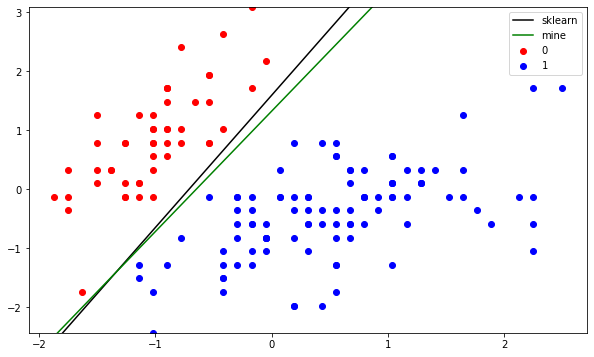

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_df[iris_df['y'] == 0][0], iris_df[iris_df['y'] == 0][1], c='red', label='0')
plt.scatter(iris_df[iris_df['y'] == 1][0], iris_df[iris_df['y'] == 1][1], c='blue', label='1')

x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
# xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# grid = np.c_[xx1.ravel(), xx2.ravel()]
# probs = log_regr.predict(grid).reshape(xx1.shape)
# plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black', label='sklearn')
# probs = model.predict(grid, 0.5).reshape(xx1.shape)
# plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green', label='my log regr')
xx = np.linspace(x1_min, x1_max)
plt.ylim([x2_min, x2_max])

w = log_regr.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (log_regr.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', label='sklearn')

w = iris_model.theta
a = -w[1] / w[2]
yy = a * xx - (w[0]) / w[2]
plt.plot(xx, yy, 'g-', label='mine')

plt.legend()

# 3. Logistic Regression Spam Classification

In [23]:
spam_df = pd.read_csv('spambase.csv', sep=',', header=None)
spam_data = spam_df.values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(spam_data[:,:-1], 
                                                    spam_data[:,-1], 
                                                    test_size=1/3, 
                                                    random_state=0)

In [25]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
spam_model = MyLogRegr(lr=0.01, stop_iter=1500,verbose=True, standardize=False)
spam_model.fit(x_train, y_train)

<ipython-input-18-177b9f8dc724>:9: RuntimeWarning: divide by zero encountered in log
  self._log_loss = lambda y, h: np.mean(y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-18-177b9f8dc724>:9: RuntimeWarning: invalid value encountered in multiply
  self._log_loss = lambda y, h: np.mean(y * np.log(h) - (1 - y) * np.log(1 - h))


In [27]:
def get_test_stats(y, y_hat):
    acc = np.sum(y_hat == y)/len(y)
    true_pos = np.sum(np.equal(y_hat, 1) & np.equal(y, 1))
    # true_neg = np.sum(np.equal(y_hat, 1) & np.equal(y, 0))
    false_pos = np.sum(np.equal(y_hat, 0) & np.equal(y, 1))
    false_neg = np.sum(np.equal(y_hat, 0) & np.equal(y, 0))
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    f1_measure = 2*precision*recall/(precision+recall)

    print(f"acc={acc:.4f}, precision={precision:.4f}, recall={recall:.4f}, f1_measure={f1_measure:.4f}")

In [28]:
y_test_predict = spam_model.predict(x_test, 0.5)
get_test_stats(y_test, y_test_predict)

acc=0.8664, precision=0.7203, recall=0.3371, f1_measure=0.4593


# 4. Naive Bayes Classifier

In [29]:
spam_df_train = pd.DataFrame(x_train)
spam_df_train['y'] = y_train

In [30]:
X_Y_pos = spam_df_train[spam_df_train['y'] == 1].values[:,:-1]
X_Y_neg = spam_df_train[spam_df_train['y'] == 0].values[:,:-1]

In [31]:
scaler_pos = StandardScaler().fit(X_Y_pos)
scaler_neg = StandardScaler().fit(X_Y_neg)

total = len(spam_df_train)
P_Y_pos = len(spam_df_train[spam_df_train['y'] == 1])/total
P_Y_neg = len(spam_df_train[spam_df_train['y'] == 0])/total

print(f"P[Y=+]={P_Y_pos}, P[Y=-]={P_Y_neg}")

P[Y=+]=0.3883273557222041, P[Y=-]=0.6116726442777959


In [32]:
eps = 2e-26
G_pos = gaus_dist(x_test, scaler_pos.mean_, scaler_pos.var_**2) + eps
P_Y_pos_X = np.sum(np.log(G_pos), axis=1) + np.log(P_Y_pos)

G_neg = gaus_dist(x_test, scaler_neg.mean_, scaler_neg.var_**2) + eps
P_Y_neg_X = np.sum(np.log(G_neg), axis=1) + np.log(P_Y_neg)

In [33]:
y_test_predict = P_Y_pos_X > P_Y_neg_X
get_test_stats(y_test, y_test_predict)

acc=0.8429, precision=0.6415, recall=0.3086, f1_measure=0.4167


# 5. Decision Trees

In [34]:
# Turn into binary features
def binarize_features(orginal_df):
    bin_df = orginal_df.drop('y', axis=1).copy().to_numpy()
    mean = np.mean(bin_df)
    bin_df[bin_df > mean] = 1
    bin_df[bin_df <= mean] = 0
    bin_df = pd.DataFrame(bin_df)

    features = set(bin_df.keys())

    # Add 'y' back in
    bin_df['y'] = orginal_df['y']
    
    return bin_df, features

In [35]:
spam_bin_train, attributes = binarize_features(spam_df_train)

In [36]:
def get_best_feature(examples, attributes):
    total = len(examples)
    E_Y_pos = cross_entropy(len(examples[examples['y'] == 1])/total)
    E_Y_neg = cross_entropy(len(examples[examples['y'] == 0])/total)
    E_Y = E_Y_pos + E_Y_neg

    info_gains = {}
    for feature in attributes:
        entropy = 0
        for val in [0, 1]:
            t = len(examples[examples[feature] == val])
            p = len(examples[(examples[feature] == val) & (examples['y'] == 1)])
            n = t-p
            if t > 0 and p*n > 0:
                entropy += (t/total)*(cross_entropy(p/t) + cross_entropy(n/t))
        info_gains[feature] = E_Y - entropy

    best_att = max(info_gains.items(), key=operator.itemgetter(1))[0]
    return best_att, info_gains[best_att]

In [37]:
def ID3 (examples, root, attributes):
    y0 = len(examples[examples['y'] == 0])
    y1 = len(examples[examples['y'] == 1])
    mode = 0 if y0 > y1 else 1
    if y0 == 0:
        return {'label': 1}

    if y1 == 0:
        return {'label': 0}

    if attributes == set():
        return {'label': mode}

    att, _ = get_best_feature(examples, attributes)
#     att = list(attributes)[0]    # NAIVE
    root['att'] = att
    
    for val in [0, 1]:
        node = dict({'att': None, 1: None, 0: None})
        examples_subset = examples[examples[att] == val]
        if len(examples_subset) == 0:
            root[val] = {'label': mode}
        else:
            root[val] = ID3(examples_subset, node, attributes - {att})
    
    return root

In [38]:
root = dict({'att': None, 1: None, 0: None})
%time tree = ID3(spam_bin_train, root, attributes)

CPU times: user 27.8 s, sys: 87.8 ms, total: 27.9 s
Wall time: 27.9 s


In [44]:
# tree

In [40]:
spam_df_test = pd.DataFrame(x_test)
spam_df_test['y'] = y_test

spam_bin_test, _ = binarize_features(spam_df_test)
spam_bin_test_data = spam_bin_test.values

In [41]:
def traverse_tree(node, feature):
    if 'att' not in node:
        return node['label']
    else:
        att = node['att']
        f = feature[att]
        return traverse_tree(node[f], feature)

In [42]:
y_test_predict = []
for r in range(spam_bin_test_data.shape[0]):
    y_test_predict.append(
        traverse_tree(tree, spam_bin_test_data[r,:-1])
    )
get_test_stats(y_test, y_test_predict)

acc=0.8990, precision=0.8666, recall=0.3909, f1_measure=0.5387


In [43]:
# ID3 (Examples, Target_Attribute, Attributes)
#     Create a root node for the tree
#     If all examples are positive, Return the single-node tree Root, with label = +.
#     If all examples are negative, Return the single-node tree Root, with label = -.
#     If number of predicting attributes is empty, then Return the single node tree Root,
#     with label = most common value of the target attribute in the examples.
#     Otherwise Begin
#         A ← The Attribute that best classifies examples.
#         Decision Tree attribute for Root = A.
#         For each possible value, vi, of A,
#             Add a new tree branch below Root, corresponding to the test A = vi.
#             Let Examples(vi) be the subset of examples that have the value vi for A
#             If Examples(vi) is empty
#                 Then below this new branch add a leaf node with label = most common target value in the examples
#             Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
#     End
#     Return Root